In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter = ";")
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter = ";")
white['type'] = ['white'] * white.shape[0]
red['type'] = ['red'] * red.shape[0]

In [ ]:
wine  = pd.concat([white,red])
wine['type'] = wine['type'].astype('category')
wine.reset_index(inplace=True, drop=True)

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [ ]:
wine.isna().sum()   #no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [ ]:
wine = swap_columns(wine,'quality', 'type')

In [ ]:
wine['type'] = pd.factorize(wine['type'])[0]

Correlation plot which shows that some of the variables are highly correlated with each other, showing multicollinearity. We also notice that none of the variables have strong correlation with the target variable, with alcohol having a moderate correlation.

In [ ]:
corr = wine.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.486740,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.653036,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.187397,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.348821,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.512678,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.471644,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.700357,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.390645,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.329129,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.487218,0.038485


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine[wine.columns[:-1]], wine[wine.columns[-1:]], test_size=0.25, random_state=42)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1539,7.3,0.26,0.49,5.0,0.028,32.0,107.0,0.99360,3.24,0.54,10.8,0
1109,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3,0
100,7.4,0.25,0.37,13.5,0.060,52.0,192.0,0.99750,3.00,0.44,9.1,0
5477,10.6,0.31,0.49,2.2,0.063,18.0,40.0,0.99760,3.14,0.51,9.8,1
6416,7.4,0.47,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,0
5191,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,1
5226,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,1
5390,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,1


# Example of Hyperparameter Tuning (XGBoost)

Note that many other tests were done but they are quite repetitive and often did not provide sufficient change in performance to be justified, so as to not completely clutter this notebook, we show the most significant example and tests.

We start by using cross validation with early stopping to choose best number of trees for a high learning rate of 0.2.

In [ ]:
param = {'learning_rate':0.2,'n_estimators':2000, 'objective':'reg:squarederror','seed':123}
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [ ]:
cv_results = xgb.cv(params = param, dtrain = data_dmatrix, nfold=5,
       num_boost_round=2000,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

188    0.646328
Name: test-rmse-mean, dtype: float64


Next, we analyze various hyperparameters at this learning rate using 188 trees. We start by analyzing max depth and min child weight.

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [ ]:
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate = 0.2, n_estimators=188, max_depth=5, min_child_weight=1,
 objective= 'reg:squarederror',seed=123),
 param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(learning_rate=0.2, max_depth=5,
                                    n_estimators=188,
                                    objective='reg:squarederror', seed=123),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='neg_mean_squared_error')

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 3}, -0.41950980254810133)

In [ ]:
param_test2 = {
 'max_depth':[8,9,10],
 'min_child_weight':[2,3,4]
}

In [ ]:
gsearch2 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.2, n_estimators=188, max_depth=5,
 min_child_weight=1,
 objective= 'reg:squarederror', seed=123),
 param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(learning_rate=0.2, max_depth=5,
                                    n_estimators=188,
                                    objective='reg:squarederror', seed=123),
             n_jobs=4,
             param_grid={'max_depth': [8, 9, 10],
                         'min_child_weight': [2, 3, 4]},
             scoring='neg_mean_squared_error')

In [ ]:
gsearch2.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 3}, -0.41950980254810133)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,10)]
}

In [ ]:
gsearch3 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.2, n_estimators=188, max_depth=9,
 gamma=0, min_child_weight = 3,
 objective= 'reg:squarederror', seed=123),
 param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gsearch3.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(learning_rate=0.2, max_depth=9,
                                    min_child_weight=3, n_estimators=188,
                                    objective='reg:squarederror', seed=123),
             n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.0}, -0.41950980254810133)

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,11)],
 'colsample_bytree':[i/10.0 for i in range(6,11)]
}

In [ ]:
gsearch4 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.2, n_estimators=188, max_depth=9,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', seed=123),
 param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4, cv=5)
gsearch4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(colsample_bytree=0.8, learning_rate=0.2,
                                    max_depth=9, min_child_weight=3,
                                    n_estimators=188,
                                    objective='reg:squarederror', seed=123,
                                    subsample=0.8),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.8}, -0.4241315378415532)

Now we lower the learning rate and increase the number of estimators.

In [ ]:
param = {'learning_rate':0.05,'n_estimators':2000, 'objective':'reg:squarederror', 'max_depth':9, 'min_child_weight':3, 'subsample':0.8, 'colsample_bytree':0.7, 'gamma':0, 'seed':123}
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [ ]:
cv_results = xgb.cv(params = param, dtrain = data_dmatrix, nfold=5,
       num_boost_round=2000,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

341    0.624324
Name: test-rmse-mean, dtype: float64


# AdaBoost

In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


#parameter tuned model
final_ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=0.2, n_estimators=300, random_state=0)
start = time.time()
final_ada.fit(X_train, y_train['quality'])
end = time.time()
preds_ada = final_ada.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_ada))
print("Time: %f" % (end-start))
print("RMSE Tuned: %f" % (rmse))

#default model
final_ada_default = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state=0)
start = time.time()
final_ada_default.fit(X_train, y_train['quality'])
end = time.time()
preds_ada = final_ada_default.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_ada))
print("Time: %f" % (end-start))
print("RMSE Default: %f" % (rmse))

Time: 11.601328
RMSE Tuned: 0.618683
Time: 1.781799
RMSE Default: 0.623637


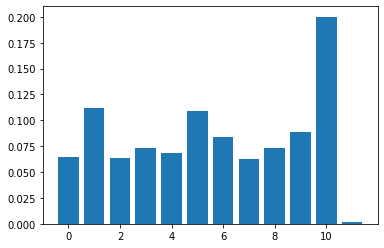

In [ ]:
plt.bar(range(len(final_ada.feature_importances_)), final_ada.feature_importances_)
plt.show()

#Gradient Boosting

In [ ]:
#importing libraries
from sklearn.ensemble import GradientBoostingRegressor


#parameter tuned model
gb_reg = GradientBoostingRegressor(n_estimators = 250, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 60, learning_rate = 0.01,random_state=123)
start = time.time()
gb_reg.fit(X_train,y_train['quality'])
end = time.time()
preds_gb = gb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_gb))
print("Time: %f" % (end-start))
print("RMSE Tuned: %f" % (rmse))

#default model
gb_reg_default = GradientBoostingRegressor(random_state = 123)
start = time.time()
gb_reg_default.fit(X_train, y_train['quality'])
end = time.time()
preds_gb = gb_reg_default.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_gb))
print("Time: %f" % (end-start))
print("RMSE Default: %f" % (rmse))

Time: 3.220084
RMSE Tuned: 0.567148
Time: 0.888193
RMSE Default: 0.652869


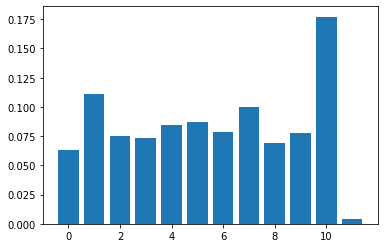

In [ ]:
plt.bar(range(len(gb_reg.feature_importances_)), gb_reg.feature_importances_)
plt.show()

#Random Forest

In [ ]:
#importing libraries
from sklearn.ensemble import RandomForestRegressor


#parameter tuned model
rf_reg = RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 60, bootstrap=True, random_state=123)
start = time.time()
rf_reg.fit(X_train,y_train['quality'])
end = time.time()
preds_rf = rf_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
print("Time: %f" % (end-start))
print("RMSE Tuned: %f" % (rmse))

#default model
rf_reg_default = RandomForestRegressor(random_state = 123)
start = time.time()
rf_reg_default.fit(X_train, y_train['quality'])
end = time.time()
preds_rf = rf_reg_default.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
print("Time: %f" % (end-start))
print("RMSE Default: %f" % (rmse))

Time: 1.722701
RMSE Tuned: 0.571268
Time: 2.638277
RMSE Default: 0.577832


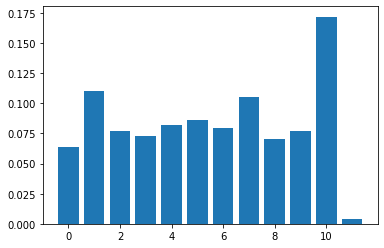

In [ ]:
plt.bar(range(len(rf_reg.feature_importances_)), rf_reg.feature_importances_)
plt.show()

# XGBoost

Note that since the presentation we have been able to further improve upon the results of XGBoost, but our conclusions remain the same as it is still outperformed by Extremely Random Trees in terms of time and accuracy. Also, note that similar to Gradient Boosting, hyperparameter tuning is essential for XGBoost. We found that max_depth was the most impactful parameter in our case, but each of the ones we showed in the above example played a relevant role in lowering the RMSE.

In [ ]:
#importing libraries
import xgboost as xgb

#parameter tuned model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.05, min_child_weight=3,max_depth = 9, subsample = 0.8, colsample_bytree = 0.7, n_estimators = 341,seed=123)
start = time.time()
xg_reg.fit(X_train,y_train['quality'])
end = time.time()
preds_xgb = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_xgb))
print("Time: %f" % (end-start))
print("RMSE Tuned: %f" % (rmse))

#default model
xg_reg_default = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)
start = time.time()
xg_reg_default.fit(X_train, y_train['quality'])
end = time.time()
preds_xgb = xg_reg_default.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_xgb))
print("Time: %f" % (end-start))
print("RMSE Default: %f" % (rmse))


Time: 2.393780
RMSE Tuned: 0.567994
Time: 0.418196
RMSE Default: 0.653605


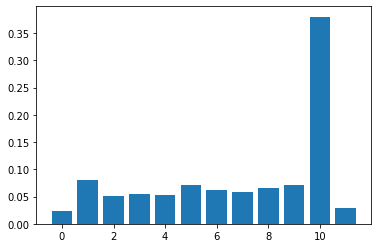

In [ ]:
plt.bar(range(len(xg_reg.feature_importances_)), xg_reg.feature_importances_)
plt.show()

# Extremely Randomized Trees

In [ ]:
#importing libraries
from sklearn.ensemble import ExtraTreesRegressor

#parameter tuned model
extrees_reg = ExtraTreesRegressor(n_estimators = 210, criterion = 'squared_error', random_state = 123)
start = time.time()
extrees_reg.fit(X_train,y_train['quality'])
end = time.time()
preds_extrees = extrees_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_extrees))
print("Time: %f" % (end-start))
print("RMSE Tuned: %f" % (rmse))
print("R2 Tuned: %f" % (r2_score(y_test,preds_extrees)))

#default model
extrees_reg_default = ExtraTreesRegressor(criterion = 'squared_error', random_state = 123)
start = time.time()
extrees_reg_default.fit(X_train, y_train['quality'])
end = time.time()
preds_extrees = extrees_reg_default.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_extrees))
print("Time: %f" % (end-start))
print("RMSE Default: %f" % (rmse))

Time: 2.853089
RMSE Tuned: 0.564513
R2 Tuned: 0.550473
Time: 1.374307
RMSE Default: 0.564661


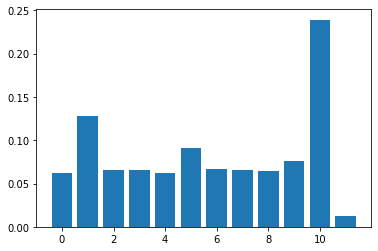

In [ ]:
plt.bar(range(len(extrees_reg.feature_importances_)), extrees_reg.feature_importances_)
plt.show()

# Conclusions

### Model Comparison

We can see that the best performing model in terms of both lowers RMSE and time is Extremely Random Trees. However, it should be noted that all of the models (aside from AdaBoost) performed very similarly. It's possible that ERT simply edged out the rest due to the standard variance you would expect to see when dealing with models like these. However, it is indisputable that ERT was able to achieve its performance at a much faster speed than its competing models, and even if they all had the exact same level of performance, that alone puts ERT in the lead. We believe that ERT is able to outperform the rest of the algorithms because of the nature of our dataset. There is multicollinearity which can negatively affect boosting techniques, and in general the dataset seems to be quite noisy with many of the features having very little if any onset correlation with the target.

### Wine Quality Prediction

Although having our RMSE be around 0.57 for most of the models seems like it would be relatively good, since the value of the target variable is generally centered around 5-7, it is not neccessarily a good model. In fact, when examining the R2 scores of our models, they generally lie around 0.55, which is not particularly good. (As a side note, the ill fit of our models may also contribute to the strong relative performance of ERT). However, despite our models not being amazing, we can see that one of the variables in particular has high feature importance in every single model, and that is the alcohol content of the wine. If nothing else, we have determined that of the physicochemical components of wine provided, the alcohol content is most important in predicting the quality of wine as determined by wine tasters.